--- Kai Hirose, Artificial Intelligence 4610, Winter Quarter, and assignment number 3 ---

<span style="color:blue">
Read the data set into a data frame, examine it, and answer the following questions:
    
* which is the y (dependent) variable?
* which are the X (independent) variables?  Include only those X variables that are meaningful for modeling purposes
* which of the X variables are numeric, and which are categorical?
</span>

```python
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 14

carseats = pd.read_csv('carseats.csv')
carseats.info()
carseats.head()
```

The y-variable is Sales.

X-variables are Sales, CompPrice, Income, Advertising, Population, Price, ShelveLoc, Age, Education, Urban, and US.

Numeric variables are Sales, CompPrice, Income, Advertising, Population, Price, Age, and Education.

Categorical variables are ShelveLoc, Urban, and US.

<span style="color:blue">
Do whatever transformations you need to prepare your data set for performing the regression.
You should end up with 
    
* a variable **X** with all the relevant independent variables properly transformed (for example for categorical variables, introduce dummy variables and delete the original column)
* a variable **y** with the dependent variable.
</span>

```python
carseats['US_Numeric'] = carseats.US.replace({'Yes':1, 'No':0})
carseats.drop('US', axis=1, inplace=True)
carseats['Urban_Numeric'] = carseats.Urban.replace({'Yes':1, 'No':0})
carseats.drop('Urban', axis=1, inplace=True)

ShelveLoc_dummies = pd.get_dummies(carseats.ShelveLoc, prefix='Loc')
ShelveLoc_dummies.drop(ShelveLoc_dummies.columns[0], axis=1, inplace=True)
carseats = pd.concat([carseats, ShelveLoc_dummies], axis=1)
carseats.drop('ShelveLoc', axis=1, inplace=True)

cols = ['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education', 'US_Numeric',
        'Urban_Numeric', 'Loc_Middle', 'Loc_Top']
X = carseats[cols]
y = carseats['Sales']
```

<span style="color:blue">
Use the sklearn linear regression model to compute the $R^2$ value for this model
</span>

```python
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()
lr.fit(X, y)
r2_score(y, lr.predict(X))
```

0.8734133434127012

<span style="color:blue">
Now use the statsmodel library to run the same model and produce a regression report.
</span>

```python
import statsmodels.api as sm
results = sm.OLS(y, sm.add_constant(X)).fit()
print(results.summary())
```

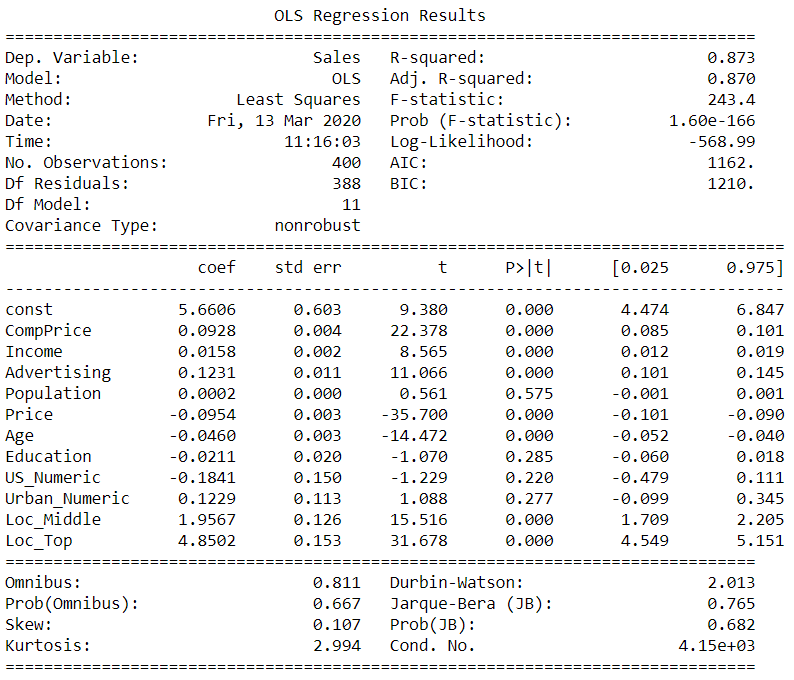

<span style="color:blue">
Using statsmodels, build a smaller model using only the variables Price and US
</span>

```python
cols2 = ['Price', 'US_Numeric']
X2= carseats[cols2]
results = sm.OLS(y, sm.add_constant(X2)).fit()
print(results.summary())
```

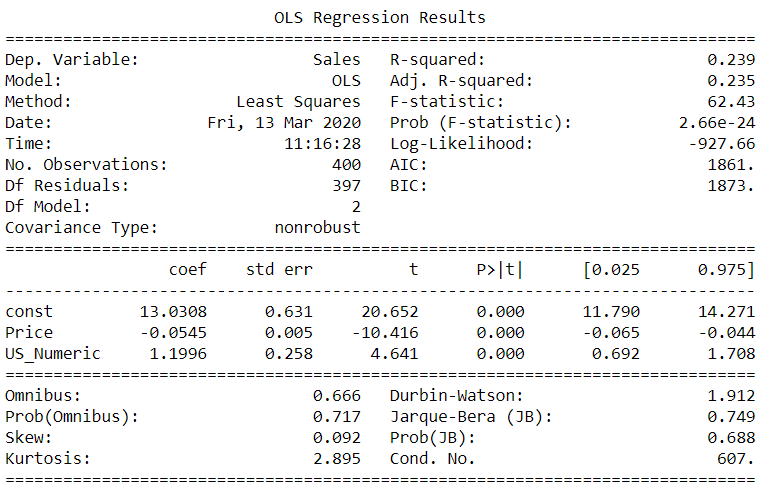

<span style="color:blue">
Answer the following questions about this model:
    
* Is this model better or worse than the model with more variables?  In what sense?
* What is the "null model," and does this model perform better than the null model?
* For each X variable in the model, report on its coefficient, and provide an English-language interpretation of the coefficient
* Which X variable(s) are significant in the model and which are not?
</span>

The smaller model is significantly worse than the bigger model at predicting values. The adjusted R-Squared value was 0.87 for the bigger model and only 0.235 for the smaller model. 

The null model is a model that just predicts the average y for any combination of X values. Theoretically the null model has an r2 of 0. Our model is better because it actually takes into account of the X values and our r2 is greater than 0.


---Bigger Model---

The coefficients in the big model were:

    const, 5.6606: The y-intercept, this model assumes 5660.6 sales on average if none of the X values are accounted for.

    CompPrice, 0.0928: For every dollar the competition was more expensive, the sales of our store rose by 92.8 units.
    
    Income, 0.0158: For every 1000 dollars the average income rose in the area, the sales of our store rose by 15.8 units.
    
    Advertising, 0.1231: For every 1000 dollars spent on advertising, the sales of our store rose by 123.1 units.
    
    Population, 0.0002: For every 1000 people in the area, the sales rose by 0.2 units.
    
    Price, -0.0954: For every dollar the price of our carseats rose, sales dropped by 95.4 units.
    
    Age, -0.0460: For every year the average age in the area rose, sales dropped by 46 units.
    
    Education, 0.0211: For every year the average level of education rose, our sales increased by 21.1 units.
    
    US_Numeric, -0.1841: If the store was located in the United States, sales were on average 184.1 units lower.
    
    Urban_Numeric, 0.1229: If the store was located in an urban region, sales were on average 122.9 units higher.
    
    Loc_Middle, 1.9567: If the carseats were located on the middle of the shelves, sales were on average 1956.7 units higher.
    
    Loc_Top, 4.8502: If the carseats were located on the top of the shelves, sales were on average 4850.2 units higher.
    
    
We can say that CompPrice, Income, Advertising, Price, Age, Loc_Middle, and Loc_Top are significant to our bigger model. On the other hand, we cannot say with certainty if Population, Education, US_Numeric, and Urban_Numeric are significant or not in our bigger model.


---Smaller Model---

The coefficients in the small model were:
    
    const, 13.0308: The y-intercept, this model assumes on average that stores have 13030.8 sales if none of the X values are accounted for.
    
    Price, -0.0545: For every dollar the price of our carseats rose, sales dropped by 54.5 units.
    
    US_Numeric, 1.1996: If the store was located in the United States, sales were on average 1199.r units higher.
    
We can say all of the variables are significant in the smaller model.

<span style="color:blue">
    
So far you have been comparing models on the basis of $R^2$, which is a measure of *training accuracy*.  Now you will also consider *test accuracy*.  Consider these four models

* A model consisting only of the variable Price
* A model with variables Price and Urban
* The full model with the variables CompPrice, Income, Advertising, Population, Price, Age, Education, Urban, US
* The full model except remove the variable CompPrice

For each compute the quantities R^2, adjusted R^2, and estimated test accuracy measured through 10-fold cross validation.
Please supply only two digits accuracy
</span>

```python
from sklearn.model_selection import cross_val_score
X1 = carseats[['Price']]
model = sm.OLS(y, sm.add_constant(X1)).fit()
scores = cross_val_score(lr, X1, y, cv=10, scoring='r2')
print([round(model.rsquared, 2), round(model.rsquared_adj, 2), round(scores.mean(), 2)])

X2 = carseats[['Price', 'Urban_Numeric']]
model = sm.OLS(y, sm.add_constant(X2)).fit()
scores = cross_val_score(lr, X2, y, cv=10, scoring='r2')
print([round(model.rsquared, 2), round(model.rsquared_adj, 2), round(scores.mean(), 2)])

X3 = carseats[['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education', 'Urban_Numeric', 'US_Numeric', 'Loc_Middle', 'Loc_Top']]
model = sm.OLS(y, sm.add_constant(X3)).fit()
scores = cross_val_score(lr, X3, y, cv=10, scoring='r2')
print([round(model.rsquared, 2), round(model.rsquared_adj, 2), round(scores.mean(), 2)])

X4 = carseats[['Income', 'Advertising', 'Population', 'Price', 'Age', 'Education', 'Urban_Numeric', 'US_Numeric', 'Loc_Middle', 'Loc_Top']]
model = sm.OLS(y, sm.add_constant(X4)).fit()
scores = cross_val_score(lr, X4, y, cv=10, scoring='r2')
print([round(model.rsquared, 2), round(model.rsquared_adj, 2), round(scores.mean(), 2)])
```

<span>
    
| Variables | R2 | Adj R2 | Test Accuracy |
|-----------|----|--------|---------------|
| Price     |   0.2 |  0.2      |    0.14           | 
| Price, Urban | 0.2 | 0.19 | 0.14 |
|CompPrice, Income, Advertising, Population, Price, Age, Education, Urban, US, ShelveLoc | 0.87 | 0.87 | 0.86 |
|Income, Advertising, Population, Price, Age, Education, Urban, US, ShelveLoc | 0.71 | 0.7 | 0.68 |
</span>

<span style="color:blue">
Comment on the difference between the first and second model, and between the third on fourth model, noting that both the differences involve adding one variable
</span>

The second model has a slightly lower adjusted R2 score than the first model. This is because the addition of Urban_Numeric does not have as much of an affect on the accuracy or effect. Because the models don't differ much in their R2 scores, the testing accuracy is also the same for both. 

The third model was better at predicting values than the fourth model by a significant amount. The R2 score is different by almost 0.16. The variable CompPrice has a bigger effect on the data and improves the accuracy a lot more. Because of this, the testing accuracy differed by 0.18 also.